In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Word vectorization and splitting dataset
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Building sequential model
from keras.models import Sequential
from keras.layers.wrappers import Bidirectional
from keras.layers import Dense, Embedding, LSTM, Dropout

# Convolutional Layers
from keras.layers import Conv1D, GlobalMaxPool1D, SpatialDropout1D, MaxPooling1D

# Cofigurations
from keras.callbacks import ModelCheckpoint

# Avoiding warnings
import warnings
import os

In [ ]:
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')
file = 'drive/MyDrive/digikala_dataset.txt'

df = pd.read_csv(file, sep="\t", header=None, error_bad_lines=False)
df.columns = ["score", "comment"]

Mounted at /content/drive


b'Skipping line 82: expected 2 fields, saw 4\nSkipping line 2429: expected 2 fields, saw 4\nSkipping line 3944: expected 2 fields, saw 4\nSkipping line 5847: expected 2 fields, saw 5\nSkipping line 6639: expected 2 fields, saw 3\nSkipping line 9319: expected 2 fields, saw 3\nSkipping line 12082: expected 2 fields, saw 17\nSkipping line 13159: expected 2 fields, saw 3\nSkipping line 14444: expected 2 fields, saw 6\nSkipping line 15109: expected 2 fields, saw 5\nSkipping line 16391: expected 2 fields, saw 29\nSkipping line 19098: expected 2 fields, saw 7\nSkipping line 19714: expected 2 fields, saw 3\nSkipping line 23227: expected 2 fields, saw 4\nSkipping line 24211: expected 2 fields, saw 5\nSkipping line 26373: expected 2 fields, saw 3\nSkipping line 29248: expected 2 fields, saw 5\nSkipping line 31275: expected 2 fields, saw 8\nSkipping line 31376: expected 2 fields, saw 3\nSkipping line 35116: expected 2 fields, saw 3\nSkipping line 36097: expected 2 fields, saw 3\nSkipping line 404

In [ ]:
df.head()

,score,comment
0,0,لطفا رنگ سفید رو هم موجود کنید
1,0,با سلام؛ من همین الان میخواستم نوک مدادی بخرم ...
2,0,من یه روز گذاشتم شارژ 12 روز شارژ داشت
3,0,برای خاموش کردن نوار چراغ پایین گوشی از برنامه...
4,0,سلام بر دیجی کالا من میخواستم امروز بخرم ولی ا...


In [ ]:
df = df[df.score != 0]
df.head()

,score,comment
5,1,سلام من سه هفتس این گوشی رو خریدم واقعا عالیه ...
6,1,دیجی جون خدایی موجودش کن خیلی وقته منتظریم.. خ...
12,1,همه چیزش معرکه ست تو این رنج قیمت مخصوصا (فورجیش)
17,1,خیلی عالیه بنظر من اگه این رو بخری خیلی سود کر...
20,1,بابا تو رو خدا شگفت انگیزش کنین قبل عید این گو...


In [ ]:
df[df.score == 1]

,score,comment
5,1,سلام من سه هفتس این گوشی رو خریدم واقعا عالیه ...
6,1,دیجی جون خدایی موجودش کن خیلی وقته منتظریم.. خ...
12,1,همه چیزش معرکه ست تو این رنج قیمت مخصوصا (فورجیش)
17,1,خیلی عالیه بنظر من اگه این رو بخری خیلی سود کر...
20,1,بابا تو رو خدا شگفت انگیزش کنین قبل عید این گو...
...,...,...
200633,1,لطفا بگید به اندروید بالا تر اپدیت می شه یانه ...
200651,1,در ضمن دوستان می توانند برای اطلاعات بیشتر و ق...
200655,1,فعلا تا وقتی z4 نیامده بهترین اندرویدیه فقط یه...
200659,1,به احترام شاهکارمایکروسافت سکوت...


In [ ]:
df[df.score == -1]

,score,comment
59,-1,من این گوشی رو 2 سال داشتم واقعا توی این دو سا...
61,-1,از دی جی کالا تشکر میکنم و متوجه دلیل تایید نش...
66,-1,با سلام خدمت دوستان. یه مورد جالب در مورد این ...
68,-1,نسبت به گوشی های هم رده خودش قیمت بالایی داره
128,-1,موبایله خوبیه . طول عمر باطریشم بالاست صفحه نم...
...,...,...
200453,-1,پيشنهاد ميکنم براي اين رنج قيمت xperia SL بخريد
200517,-1,ال جی این بار خراب کرده امیدوارم تو ورژن های ب...
200561,-1,به نظر من ارزش خريد نداره.فک نميکنم 0.1اينج بز...
200605,-1,فقط توي بعضي از بازي هاي HD که توي يک صحنه چند...


In [ ]:
# df.loc[df['score'] == -1, 'score'] = 0

In [ ]:
print(len(df[df.score == -1]))

4194


In [ ]:
print(len(df[df.score == 1]))

45823


In [ ]:
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Sentiment Analysis

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.comment, df.score, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(40013,)
(10004,)


In [ ]:
epochs = 4
batch_size = 32

n_dim = 64
n_unique_words = 5000
max_text_length = 500
pad_type = trunc_type = 'pre'
drop_embed = 0.2

n_lstm = 256
drop_lstm = 0.2

In [ ]:
token = Tokenizer(num_words=n_unique_words, lower=False)
token.fit_on_texts(x_train)


train_sequences = token.texts_to_sequences(x_train)
train_sequences_matrix = pad_sequences(train_sequences, maxlen=max_text_length)


test_sequences = token.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_text_length)

In [ ]:
print(len(train_sequences_matrix[0]))

500


#LSTM

In [ ]:
def LSTM_NN():
    model = Sequential()
    model.add(Embedding(n_unique_words, n_dim, input_length=max_text_length))
    model.add(SpatialDropout1D(drop_embed))
    model.add(LSTM(n_lstm, dropout=drop_lstm))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = LSTM_NN()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 500, 64)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 648,961
Trainable params: 648,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_sequences_matrix, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(test_sequences_matrix, y_test))

Epoch 1/4
1251/1251 [==============================] - 59s 46ms/step - loss: 0.3955 - accuracy: 0.8982 - val_loss: 0.3396 - val_accuracy: 0.8955
Epoch 2/4
1251/1251 [==============================] - 57s 46ms/step - loss: 0.2854 - accuracy: 0.8866 - val_loss: 0.1584 - val_accuracy: 0.8659
Epoch 3/4
1251/1251 [==============================] - 57s 45ms/step - loss: 0.0723 - accuracy: 0.8642 - val_loss: -0.3309 - val_accuracy: 0.8580
Epoch 4/4
1251/1251 [==============================] - 57s 45ms/step - loss: -0.3513 - accuracy: 0.8406 - val_loss: -0.1652 - val_accuracy: 0.8865


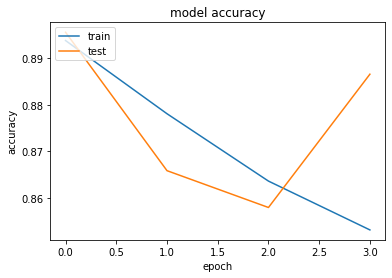

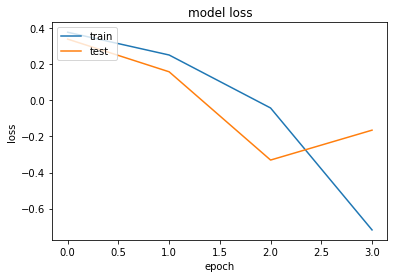

In [ ]:
plot(history)

In [ ]:
model.evaluate(test_sequences_matrix, y_test)

313/313 [==============================] - 5s 15ms/step - loss: -0.1652 - accuracy: 0.8865


[-0.1652224361896515, 0.8865453600883484]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


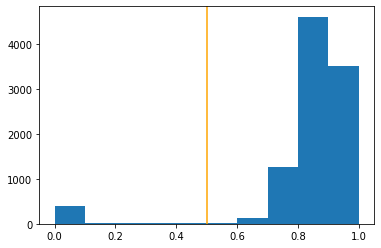

In [ ]:
y_predict = model.predict_proba(test_sequences_matrix)

plt.hist(y_predict)
_ = plt.axvline(x=.5, color='orange')

In [ ]:
sen = 'بسیار مزخرف'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict(sen_sequences_pad)
print(pre)

[[4.8014138e-19]
 [6.6116900e-07]
 [8.0188755e-12]
 [1.7248728e-25]
 [3.9694445e-18]
 [1.1678125e-15]
 [3.5638905e-08]
 [1.1022643e-11]
 [1.1678125e-15]
 [3.9694450e-18]
 [1.1678125e-15]]


In [ ]:
sen = 'بسیار عالی'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict_classes(sen_sequences_pad)
print(pre)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


#LSTM Bidirectional

In [ ]:
def BI_LSTM():
    model = Sequential()
    model.add(Embedding(n_unique_words, n_dim, input_length=max_text_length))
    model.add(SpatialDropout1D(drop_embed))
    model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = BI_LSTM()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 64)           320000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 500, 64)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               657408    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 977,921
Trainable params: 977,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_sequences_matrix, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(test_sequences_matrix, y_test))

Epoch 1/4
1251/1251 [==============================] - 107s 84ms/step - loss: 0.4088 - accuracy: 0.8964 - val_loss: 0.3561 - val_accuracy: 0.9115
Epoch 2/4
1251/1251 [==============================] - 105s 84ms/step - loss: 0.1866 - accuracy: 0.8688 - val_loss: 0.3001 - val_accuracy: 0.9048
Epoch 3/4
1251/1251 [==============================] - 106s 85ms/step - loss: 0.1243 - accuracy: 0.8609 - val_loss: -0.1415 - val_accuracy: 0.8797
Epoch 4/4
1251/1251 [==============================] - 106s 85ms/step - loss: -0.6196 - accuracy: 0.8712 - val_loss: -0.3524 - val_accuracy: 0.8844


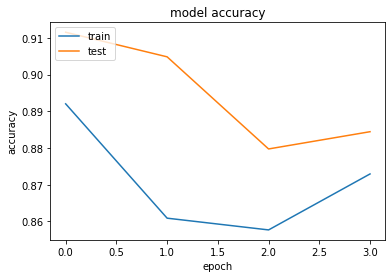

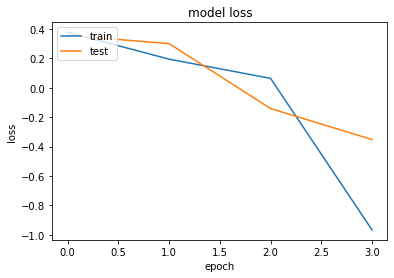

In [ ]:
plot(history)

In [ ]:
model.evaluate(test_sequences_matrix, y_test)

313/313 [==============================] - 9s 28ms/step - loss: -0.3524 - accuracy: 0.8844


[-0.3523958623409271, 0.8844462037086487]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


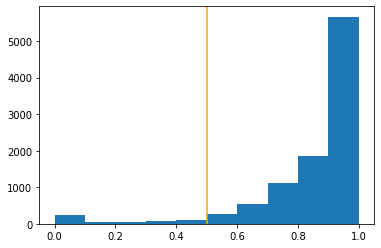

In [ ]:
y_predict = model.predict_proba(test_sequences_matrix)

plt.hist(y_predict)
_ = plt.axvline(x=.5, color='orange')

In [ ]:
sen = 'بسیار مزخرف'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict(sen_sequences_pad)
print(pre)

[[1.9131983e-05]
 [7.4790919e-01]
 [3.0482438e-01]
 [3.5798384e-16]
 [4.5035580e-05]
 [6.9839596e-05]
 [7.4734908e-01]
 [1.1113866e-02]
 [6.9839596e-05]
 [4.5035576e-05]
 [6.9839596e-05]]


In [ ]:
sen = 'بسیار عالی'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict_classes(sen_sequences_pad)
print(pre)

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


#model 3

In [ ]:
def LSTM_NN_BI():
    model = Sequential()
    model.add(Embedding(n_unique_words, n_dim, input_length=max_text_length))
    model.add(SpatialDropout1D(drop_embed))
    model.add(Bidirectional(LSTM(256, dropout=drop_lstm, return_sequences=True)))
    model.add(Bidirectional(LSTM(256, dropout=drop_lstm)))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = LSTM_NN_BI()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 500, 64)           320000    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 500, 64)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 500, 512)          657408    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 2,552,833
Trainable params: 2,552,833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_sequences_matrix, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(test_sequences_matrix, y_test))

Epoch 1/4
1251/1251 [==============================] - 235s 184ms/step - loss: 0.3441 - accuracy: 0.8851 - val_loss: -0.7645 - val_accuracy: 0.9113
Epoch 2/4
1251/1251 [==============================] - 234s 187ms/step - loss: -1.3949 - accuracy: 0.8898 - val_loss: -2.4776 - val_accuracy: 0.9040
Epoch 3/4
1251/1251 [==============================] - 234s 187ms/step - loss: -3.1154 - accuracy: 0.8841 - val_loss: 3.3178 - val_accuracy: 0.8670
Epoch 4/4
1251/1251 [==============================] - 234s 187ms/step - loss: 0.5872 - accuracy: 0.8657 - val_loss: -1.1316 - val_accuracy: 0.8611


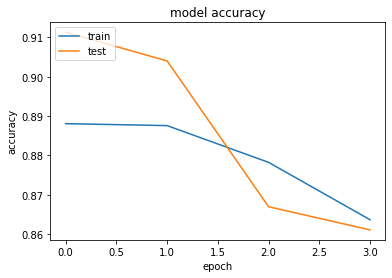

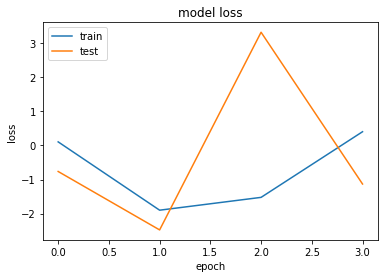

In [ ]:
plot(history)

In [ ]:
model.evaluate(test_sequences_matrix, y_test)

313/313 [==============================] - 20s 63ms/step - loss: -1.1316 - accuracy: 0.8611


[-1.1315807104110718, 0.8610555529594421]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


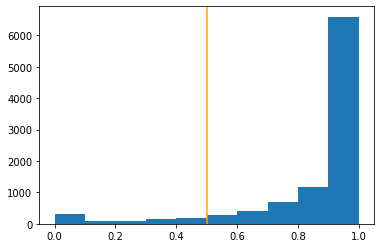

In [ ]:
y_predict = model.predict_proba(test_sequences_matrix)

plt.hist(y_predict)
_ = plt.axvline(x=.5, color='orange')

In [ ]:
sen = 'بسیار مزخرف'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict(sen_sequences_pad)
print(pre)

[[0.2746082 ]
 [0.9679956 ]
 [0.43301898]
 [0.00110995]
 [0.53281873]
 [0.13527606]
 [0.944027  ]
 [0.4824851 ]
 [0.13527606]
 [0.53281873]
 [0.13527606]]


In [ ]:
sen = 'بسیار عالی'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict_classes(sen_sequences_pad)
print(pre)

[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


#Conv BI LSTM

In [ ]:
def LSTM_NN_BI_CONV():
    model = Sequential()
    model.add(Embedding(n_unique_words, n_dim, input_length=max_text_length))
    model.add(SpatialDropout1D(drop_embed))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(2))
    model.add(  (LSTM(n_lstm, dropout=drop_lstm)))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = LSTM_NN_BI_CONV()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 500, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 498, 64)           12352     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 249, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               657408    
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 990,273
Trainable params: 990,273
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_sequences_matrix, y_train, 
          batch_size=batch_size, 
          epochs=10, 
          verbose=1, 
          validation_data=(test_sequences_matrix, y_test))

Epoch 1/10
313/313 [==============================] - 28s 79ms/step - loss: -4.0324 - accuracy: 0.8594 - val_loss: -3.0687 - val_accuracy: 0.8361
Epoch 2/10
313/313 [==============================] - 24s 77ms/step - loss: -6.6635 - accuracy: 0.8641 - val_loss: -4.5477 - val_accuracy: 0.8368
Epoch 3/10
313/313 [==============================] - 24s 77ms/step - loss: -10.0608 - accuracy: 0.8577 - val_loss: -5.6016 - val_accuracy: 0.8606
Epoch 4/10
313/313 [==============================] - 24s 76ms/step - loss: -14.0583 - accuracy: 0.8621 - val_loss: -7.2217 - val_accuracy: 0.8755
Epoch 5/10
313/313 [==============================] - 24s 76ms/step - loss: -16.7440 - accuracy: 0.8626 - val_loss: -7.8617 - val_accuracy: 0.8595
Epoch 6/10
313/313 [==============================] - 24s 76ms/step - loss: -21.8636 - accuracy: 0.8622 - val_loss: -9.7139 - val_accuracy: 0.7816
Epoch 7/10
313/313 [==============================] - 24s 76ms/step - loss: -19.9095 - accuracy: 0.8330 - val_loss: -6.0

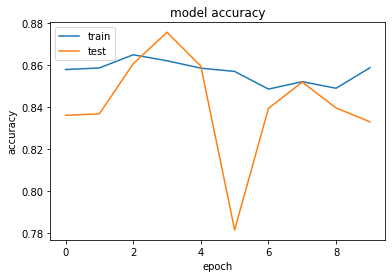

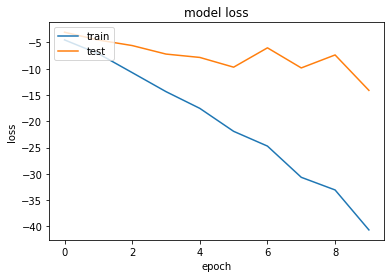

In [ ]:
plot(history)

In [ ]:
model.evaluate(test_sequences_matrix, y_test)

313/313 [==============================] - 5s 15ms/step - loss: -14.1281 - accuracy: 0.8330


[-14.128059387207031, 0.8329668045043945]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


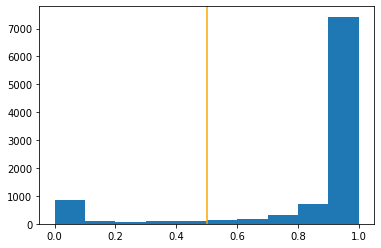

In [ ]:
y_predict = model.predict_proba(test_sequences_matrix)

plt.hist(y_predict)
_ = plt.axvline(x=.5, color='orange')

In [ ]:
sen = 'بسیار مزخرف'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict(sen_sequences_pad)
print(pre)

[[3.14735662e-05]
 [2.53569216e-01]
 [1.38308023e-04]
 [1.57959922e-03]
 [1.33111526e-03]
 [8.20240821e-04]
 [1.24118865e-01]
 [2.06241190e-01]
 [8.20240821e-04]
 [1.33111526e-03]
 [8.20240821e-04]]


In [ ]:
sen = 'بسیار عالی'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict_classes(sen_sequences_pad)
print(pre)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


#LSTM Dropout (out)

## LSTM 100

In [ ]:
def LSTM_D_out():
  model = Sequential()
  model.add(Embedding(n_unique_words, n_dim, input_length=max_text_length))
  model.add(Dropout(0.2))
  model.add(LSTM(100))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [ ]:
model = LSTM_D_out()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
dropout (Dropout)            (None, 500, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 386,101
Trainable params: 386,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_sequences_matrix, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(test_sequences_matrix, y_test))

Epoch 1/4
313/313 [==============================] - 16s 45ms/step - loss: 0.4463 - accuracy: 0.8934 - val_loss: 0.2987 - val_accuracy: 0.8846
Epoch 2/4
313/313 [==============================] - 14s 45ms/step - loss: 0.1898 - accuracy: 0.8765 - val_loss: 0.2232 - val_accuracy: 0.8168
Epoch 3/4
313/313 [==============================] - 14s 45ms/step - loss: -0.1090 - accuracy: 0.8631 - val_loss: -0.0835 - val_accuracy: 0.8609
Epoch 4/4
313/313 [==============================] - 14s 45ms/step - loss: -0.1785 - accuracy: 0.8631 - val_loss: -0.3234 - val_accuracy: 0.8797


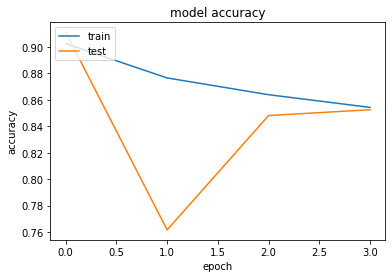

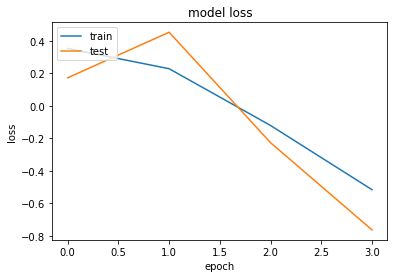

In [ ]:
plot(history)

In [ ]:
model.evaluate(test_sequences_matrix, y_test)

313/313 [==============================] - 9s 30ms/step - loss: -0.7627 - accuracy: 0.8525


[-0.7627005577087402, 0.8524590134620667]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


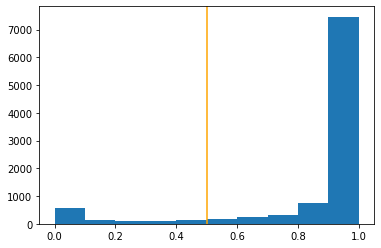

In [ ]:
y_predict = model.predict_proba(test_sequences_matrix)

plt.hist(y_predict)
_ = plt.axvline(x=.5, color='orange')

In [ ]:
sen = 'بسیار مزخرف'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict(sen_sequences_pad)
print(pre)

[[0.04858617]
 [0.9525111 ]
 [0.8636789 ]
 [0.01721057]
 [0.2548307 ]
 [0.61824906]
 [0.9701086 ]
 [0.70582837]
 [0.61824906]
 [0.2548307 ]
 [0.61824906]]


In [ ]:
sen = 'بسیار عالی'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict_classes(sen_sequences_pad)
print(pre)

[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## LSTM 256

In [ ]:
def LSTM_D_out():
  model = Sequential()
  model.add(Embedding(n_unique_words, n_dim, input_length=max_text_length))
  model.add(Dropout(0.7))
  model.add(LSTM(256))
  # model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [ ]:
model = LSTM_D_out()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 648,961
Trainable params: 648,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_sequences_matrix, y_train, 
          batch_size=batch_size, 
          epochs=10, 
          verbose=1, 
          validation_data=(test_sequences_matrix, y_test))

Epoch 1/10
313/313 [==============================] - 24s 72ms/step - loss: 2.6039 - accuracy: 0.7668 - val_loss: -0.1356 - val_accuracy: 0.8444
Epoch 2/10
313/313 [==============================] - 22s 71ms/step - loss: 0.0247 - accuracy: 0.8428 - val_loss: 0.1277 - val_accuracy: 0.8829
Epoch 3/10
313/313 [==============================] - 22s 71ms/step - loss: -0.1398 - accuracy: 0.8657 - val_loss: -0.2961 - val_accuracy: 0.8899
Epoch 4/10
313/313 [==============================] - 23s 72ms/step - loss: -0.4440 - accuracy: 0.8667 - val_loss: -0.5539 - val_accuracy: 0.8905
Epoch 5/10
313/313 [==============================] - 22s 71ms/step - loss: -0.4252 - accuracy: 0.8216 - val_loss: -0.5157 - val_accuracy: 0.8838
Epoch 6/10
313/313 [==============================] - 22s 71ms/step - loss: -0.6374 - accuracy: 0.8666 - val_loss: 0.0954 - val_accuracy: 0.8620
Epoch 7/10
313/313 [==============================] - 22s 71ms/step - loss: -0.0478 - accuracy: 0.8551 - val_loss: -0.1104 - val

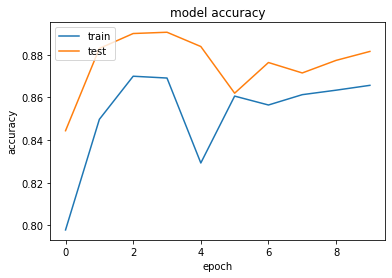

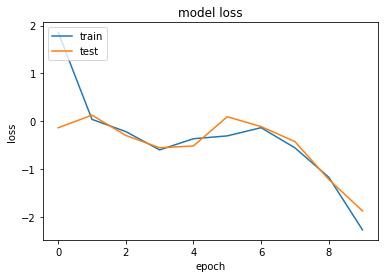

In [ ]:
plot(history)

In [ ]:
model.evaluate(test_sequences_matrix, y_test)

313/313 [==============================] - 5s 15ms/step - loss: -1.8737 - accuracy: 0.8815


[-1.8736625909805298, 0.8815473914146423]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


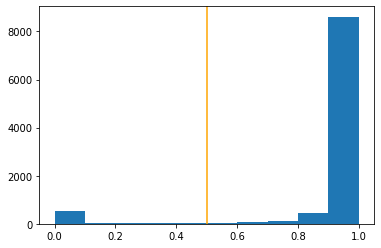

In [ ]:
y_predict = model.predict_proba(test_sequences_matrix)

plt.hist(y_predict)
_ = plt.axvline(x=.5, color='orange')

In [ ]:
sen = 'بسیار مزخرف'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict(sen_sequences_pad)
print(pre)

[[1.3606377e-02]
 [9.3375152e-01]
 [8.0214596e-01]
 [2.0806857e-07]
 [4.1632083e-01]
 [6.1240828e-01]
 [7.6929408e-01]
 [8.2309526e-01]
 [6.1240828e-01]
 [4.1632083e-01]
 [6.1240828e-01]]


In [ ]:
sen = 'بسیار عالی'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict_classes(sen_sequences_pad)
print(pre)

[[0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## LSTM 256 - Dense

In [ ]:
def LSTM_D_out_Dence():
  model = Sequential()
  model.add(Embedding(n_unique_words, n_dim, input_length=max_text_length))
  model.add(LSTM(256))
  model.add(Dropout(0.7))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [ ]:
model = LSTM_D_out_Dence()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_sequences_matrix, y_train, 
          batch_size=batch_size, 
          epochs=10, 
          verbose=1, 
          validation_data=(test_sequences_matrix, y_test))

Epoch 1/10
313/313 [==============================] - 25s 74ms/step - loss: 1.1087 - accuracy: 0.8888 - val_loss: 0.2169 - val_accuracy: 0.9017
Epoch 2/10
313/313 [==============================] - 22s 71ms/step - loss: -0.2245 - accuracy: 0.9005 - val_loss: -5.8880 - val_accuracy: 0.9043
Epoch 3/10
313/313 [==============================] - 23s 72ms/step - loss: -14.0859 - accuracy: 0.8895 - val_loss: -62.5623 - val_accuracy: 0.9096
Epoch 4/10
313/313 [==============================] - 22s 71ms/step - loss: 176.2098 - accuracy: 0.8536 - val_loss: -111.4943 - val_accuracy: 0.9102
Epoch 5/10
313/313 [==============================] - 22s 71ms/step - loss: -613.1508 - accuracy: 0.8468 - val_loss: -5044.8911 - val_accuracy: 0.9003
Epoch 6/10
313/313 [==============================] - 22s 71ms/step - loss: -8351.0617 - accuracy: 0.8912 - val_loss: -36467.6641 - val_accuracy: 0.9080
Epoch 7/10
313/313 [==============================] - 22s 72ms/step - loss: -53589.2096 - accuracy: 0.8778 - 

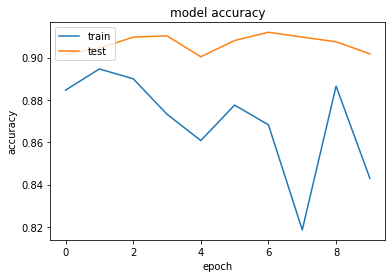

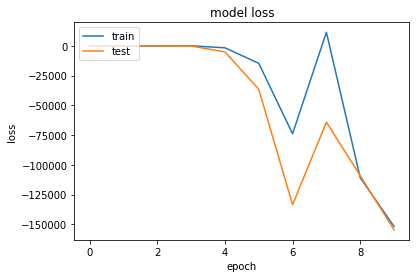

In [ ]:
plot(history)

In [ ]:
model.evaluate(test_sequences_matrix, y_test)

313/313 [==============================] - 5s 14ms/step - loss: -154694.4688 - accuracy: 0.9017


[-154694.46875, 0.9017392992973328]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


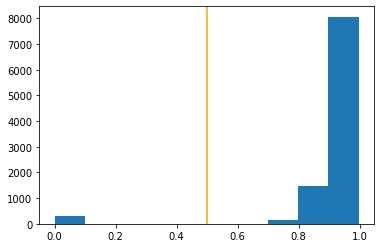

In [ ]:
y_predict = model.predict_proba(test_sequences_matrix)

plt.hist(y_predict)
_ = plt.axvline(x=.5, color='orange')

In [ ]:
sen = 'بسیار مزخرف'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict(sen_sequences_pad)
print(pre)

[[0.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [7.848537e-12]
 [0.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [0.000000e+00]]


In [ ]:
sen = 'بسیار عالی'
sen_sequences = token.texts_to_sequences(sen)
sen_sequences_pad = pad_sequences(sen_sequences, maxlen=max_text_length)

pre = model.predict_classes(sen_sequences_pad)
print(pre)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


#LSTM Drop out (in)

## LSTM 256 - Dense

In [ ]:
def LSTM_D_IN():
    model = Sequential()
    model.add(Embedding(n_unique_words, n_dim, input_length=max_text_length))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dropout(0.7))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = LSTM_D_IN()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               25856     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_sequences_matrix, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(test_sequences_matrix, y_test))

Epoch 1/4
313/313 [==============================] - 583s 2s/step - loss: -348.3504 - accuracy: 0.8010 - val_loss: -1882.6884 - val_accuracy: 0.8917
Epoch 2/4
313/313 [==============================] - 586s 2s/step - loss: -4617.2337 - accuracy: 0.8816 - val_loss: -11495.6748 - val_accuracy: 0.8919
Epoch 3/4
313/313 [==============================] - 590s 2s/step - loss: -25317.9639 - accuracy: 0.8848 - val_loss: -37251.7617 - val_accuracy: 0.9025
Epoch 4/4
313/313 [==============================] - 598s 2s/step - loss: -74781.5330 - accuracy: 0.8941 - val_loss: -89980.8047 - val_accuracy: 0.8923
